#### Imports

In [1]:
from sklearn.ensemble import RandomForestClassifier
import evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt
from statistics import mean

#### Retrieve Stored Variables
Standard dataset

In [2]:
%store -r data

#### Variable That Removes Class Variable and ID from Dataset

In [3]:
clean = list(set(list(data)) - set(['default_payment_next_month', 'id']))

#### Seperate Dataset into Training and Testing Subsets
70/30 split will be used

In [4]:
std_x_train, std_x_test, std_y_train, std_y_test = train_test_split(data[clean], 
                                                                    data['default_payment_next_month'], 
                                                                    test_size=0.3, 
                                                                    random_state=14)

#### Instantiate Decision Tree Model Object

In [5]:
model = RandomForestClassifier()

#### Train the Model on the Training Data and Use it to Predict Y Values of Test Set
Include the time taken

In [6]:
start = time.time()
model.fit(X = std_x_train,
          y = std_y_train)
results = confusion_matrix(y_pred = model.predict(std_x_test),
                           y_true = std_y_test)
end = time.time()
print(f'The model took {round(end - start, 2)} seconds to train and predict.')

The model took 12.01 seconds to train and predict.


#### Display Confusion Matrix

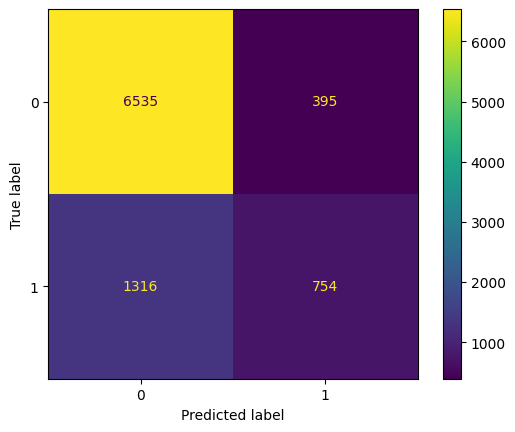

In [7]:
ConfusionMatrixDisplay(results).plot()

#### Evaluate the Model Using Custom Eval Metrics Class

In [8]:
metrics = evaluation.evalMetrics(results)

In [9]:
print(f'The Accuracy of the Model: {round(metrics.accuracy(),3)}')
print(f'The Precision of the Model: {round(metrics.precision(),2)}')
print(f'The Recall of the Model: {round(metrics.recall(),2)}')
print(f'The F-Score of the Model: {round(metrics.fScore(),2)}')
print(f'The Negative Predictive Value  of the Model: {round(metrics.negativePredictiveValue(),2)}')
print(f'The Positive Predicitive Value of the Model: {round(metrics.positivePredictiveValue(),2)}')

The Accuracy of the Model: 0.81
The Precision of the Model: 0.83
The Recall of the Model: 0.94
The F-Score of the Model: 0.88
The Negative Predictive Value  of the Model: 0.66
The Positive Predicitive Value of the Model: 0.83


#### Cross Validate the Model Using Accuracy

In [10]:
start = time.time()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=28)
cv_scores = cross_val_score(model, data[clean], data['default_payment_next_month'], scoring='accuracy', cv=cv)
end = time.time()

#### CV Scores, Min and Max

In [11]:
print(cv_scores)
print()
print('Max Cross Validation Score: ', max(cv_scores))
print('Min Cross Validation Score: ', min(cv_scores))

[0.81733333 0.82133333 0.81333333 0.81766667 0.824      0.80266667
 0.82066667 0.817      0.817      0.809      0.814      0.812
 0.82533333 0.82433333 0.82333333 0.80066667 0.81833333 0.81466667
 0.81666667 0.807      0.80966667 0.81433333 0.82166667 0.821
 0.82       0.807      0.81166667 0.823      0.80733333 0.82166667]

Max Cross Validation Score:  0.8253333333333334
Min Cross Validation Score:  0.8006666666666666


#### Evaluate the Results of the Cross-Validation

In [12]:
print(f'Cross Validation took {round(end - start, 2)} seconds and produced an average accuracy of {round(mean(cv_scores),3)}')

Cross Validation took 603.25 seconds and produced an average accuracy of 0.816


#### Analyze Feature Importances and Select the 5 Most Meaningful
Create dict of feature values and their associated label

In [13]:
features = {}
for i in range(len(model.feature_importances_)):
    features[model.feature_importances_[i]] = model.feature_names_in_[i]

Select the 5 best features and return the labels as a list. Store this variable in the envrionment for use in the KNN Algorithm.

In [14]:
selected_features = {k: v for k,v in features.items() if k in sorted(features.keys())[::-1][:5]}
selected_features = list(selected_features.values())
selected_features

['pay_0', 'bill_amt2', 'age', 'bill_amt1', 'limit_bal']

In [15]:
%store selected_features

Stored 'selected_features' (list)


#### Retrain Model on Selected Features and Evaluate Change in Performance

In [16]:
features_x_train, features_x_test, features_y_train, features_y_test = train_test_split(data[selected_features], 
                                                                    data['default_payment_next_month'], 
                                                                    test_size=0.3, 
                                                                    random_state=96)

#### Reinstantiate Model and Fit/Predict

In [17]:
model = RandomForestClassifier()

In [18]:
start = time.time()
model.fit(X = features_x_train,
          y = features_y_train)
results = confusion_matrix(y_pred = model.predict(features_x_test),
                           y_true = features_y_test)
end = time.time()
print(f'The model took {round(end - start, 2)} seconds to train and predict.')

The model took 7.75 seconds to train and predict.


#### Display CF

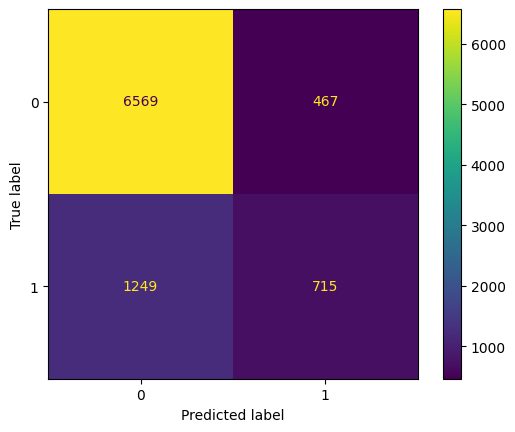

In [19]:
ConfusionMatrixDisplay(results).plot()

#### Evaluate and Cross-Validate

In [20]:
metrics = evaluation.evalMetrics(results)
print(f'The Accuracy of the Model: {round(metrics.accuracy(),3)}')
print(f'The Precision of the Model: {round(metrics.precision(),2)}')
print(f'The Recall of the Model: {round(metrics.recall(),2)}')
print(f'The F-Score of the Model: {round(metrics.fScore(),2)}')
print(f'The Negative Predictive Value  of the Model: {round(metrics.negativePredictiveValue(),2)}')
print(f'The Positive Predicitive Value of the Model: {round(metrics.positivePredictiveValue(),2)}')

The Accuracy of the Model: 0.809
The Precision of the Model: 0.84
The Recall of the Model: 0.93
The F-Score of the Model: 0.88
The Negative Predictive Value  of the Model: 0.6
The Positive Predicitive Value of the Model: 0.84


In [21]:
start = time.time()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=17)
cv_scores = cross_val_score(model, data[selected_features], data['default_payment_next_month'], scoring='accuracy', cv=cv)
end = time.time()
print(f'Cross Validation took {round(end - start, 2)} seconds and produced an average accuracy of {round(mean(cv_scores),3)}')

Cross Validation took 337.06 seconds and produced an average accuracy of 0.804


#### CV Scores, Min and Max

In [22]:
print(cv_scores)
print()
print('Max Cross Validation Score: ', max(cv_scores))
print('Min Cross Validation Score: ', min(cv_scores))

[0.81066667 0.808      0.802      0.80666667 0.80766667 0.80433333
 0.803      0.79066667 0.80433333 0.80133333 0.80333333 0.80833333
 0.791      0.79966667 0.817      0.79933333 0.81566667 0.80433333
 0.79533333 0.797      0.798      0.80866667 0.803      0.812
 0.79833333 0.80066667 0.79433333 0.797      0.81166667 0.81566667]

Max Cross Validation Score:  0.817
Min Cross Validation Score:  0.7906666666666666
